<a href="https://colab.research.google.com/github/tankTopTaro/DOST-FNRI-Assessment/blob/main/DOST_FNRI_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Technical Specialist IV Exam

## Part I.
  1. Train a machine learning model.
  2. Deploy the model to the web.
  
**The Problem:**
  Predict if an Australian will buy a bike according to the factors in the dataset.

In [11]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [12]:
data_set = pd.read_csv('https://raw.githubusercontent.com/tankTopTaro/DOST-FNRI-Assessment/refs/heads/main/AW_all_data.csv')
data_set

,Unnamed: 0,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,0,1,1,0,0,2,137947,89,0
1,1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,0,0,0,1,3,3,101141,117,1
2,2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,0,1,1,1,3,3,91945,123,0
3,3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,1,0,0,1,0,0,86688,50,0
4,4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,1,0,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16399,16399,29478,Darren,Carlson,5240 Premier Pl.,Stoke-on-Trent,England,United Kingdom,AS23,1 (11) 500 555-0132,1959-05-25,Graduate Degree,Clerical,0,0,1,0,0,3,45986,65,0
16400,16400,29479,Tommy,Tang,"111, rue Maillard",Versailles,Yveline,France,78000,1 (11) 500 555-0136,1958-07-04,Graduate Degree,Clerical,0,1,1,0,0,1,80049,77,0
16401,16401,29480,Nina,Raji,9 Katherine Drive,London,England,United Kingdom,SW19 3RU,1 (11) 500 555-0146,1960-11-10,Graduate Degree,Clerical,1,0,1,0,0,3,60417,48,1
16402,16402,29481,Ivan,Suri,Knaackstr 4,Hof,Bayern,Germany,95010,1 (11) 500 555-0144,1960-01-05,Graduate Degree,Clerical,0,0,0,0,0,3,66653,65,0


In [32]:
# Column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AveMonthSpend']),
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag'])
)

# Features and labels
X = data_set.drop('BikeBuyer', axis=1)
y = data_set['BikeBuyer']

# Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to training data
ct.fit(X_train)

# Normalize data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [36]:
# Visulize
X_train_normal[0]

array([1.        , 0.2       , 0.2       , 0.91522705, 0.56493506,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        ])

In [37]:
X_train.shape, X_train_normal.shape

((13123, 21), (13123, 21))

In [40]:
# Build the model
bike_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[21]),
    tf.keras.layers.Dense(1)
])

bike_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

history = bike_model.fit(X_train_normal, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
bike_model.evaluate(X_test_normal, y_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7845 - loss: 0.4677


[0.47962284088134766, 0.7768973112106323]

Text(0.5, 1.0, 'bike_model')

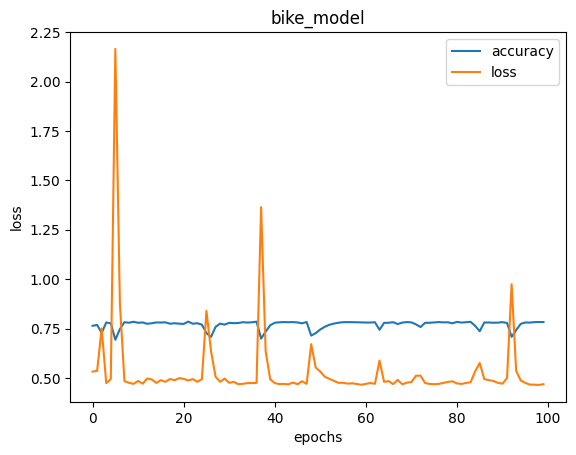

In [42]:
# Plot history (loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("bike_model")

In [43]:
bike_model.predict(X_test_normal)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 0.17788753],
       [-0.04459599],
       [ 0.02341347],
       ...,
       [ 1.0185204 ],
       [ 0.4982071 ],
       [ 0.12766436]], dtype=float32)